# 🧰 Being productive with notebooks in `github.dev`

# Cells
A notebook is composed of a list of cells. Cells contain either explanatory text in markdown format, or executable code and its output. When a cell is selected in VS Code locally or in `github.dev`, it is outlined in blue. Try clicking on a cell to select it!

## Code cells
Below is an example of a **code cell**. Once you see the `Pyolite` kernel enabled in the upper right corner of your notebook, click in a cell in your notebook to select it, and then execute the contents in one of the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.


In [1]:
a = 10
a

10

## Markdown cells
This is a **markdown cell**. You can **double-click** to edit this cell. 

You can also add math to text cells using [LaTeX](http://www.latex-project.org/), which will be rendered by [MathJax](https://www.mathjax.org). Just place the statement within a pair of **\$** signs. 

As an example, `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$


## Adding and moving cells
You can add new cells by using the **+ CODE** and **+ MARKDOWN** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and dragging it into a new position.

Consecutive cells can be selected by using `Shift` + `Click`-ing on a selection.  

# Executing code with Python
VS Code Notebooks are built using the [Jupyter Notebook](https://jupyter.org/) extension. Below are some examples of convenience functions provided.

Long running python processes can be interrupted. Run the following cell and select **the square in the cell gutter** to stop execution.

In [4]:
import time
print("Sleeping")
print("Done Sleeping")

Sleeping


KeyboardInterrupt: 

## Magics
VS Code Notebooks share the notion of magics from Jupyter. There are shorthand annotations that change how a cell's text is executed. To learn more, see [Jupyter's magics page](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb). 


In [ ]:
%%html
<marquee style='width: 30%; color: yellow;'><b>Thank goodness, we reached Friday!</b></marquee>

In [ ]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:orange; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:pink; stroke:black; fill-opacity:0.5;" />
</svg>

## Rich, interactive outputs
Until now all of the generated outputs have been text, but they can be more interesting, like the chart below. 

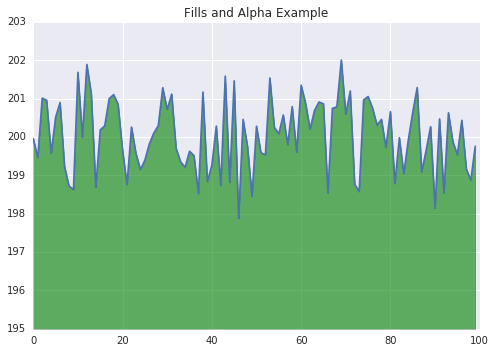

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

## Exception Formatting

Exceptions are formatted nicely in [github.dev]() outputs:

In [ ]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: 

# 🤖 Integration with Github

[github.dev] is fully-integrated with Github. It allows you to share, comment, and collaborate on the same code with multiple people:

Work in progress; topics to include:
* Recommended extensions.
* Reviewing pull requests for notebooks.
* Exporting notebooks as HTML with Github Actions.

# 🔪 Papercuts when working with Pyodide and `github.dev`

## System aliases

Jupyter includes shortcuts for common operations, such as `ls`. In `github.dev`, this functionality will fail to execute, as you do not have access to a terminal. If you use VS Code notebooks locally, or in Codespaces, this cell will work as intended.

In [ ]:
!ls /bin

<class 'OSError'>: "sh" shell not found

That `!ls` probably generated a large output. You can select the cell and clear the output by either: 

1. Clicking on the clear output button (x) in the toolbar above the cell; or
2. Right clicking the left gutter of the output area and selecting "Clear output" from the context menu.

Execute any other process using `!` with string interpolation from python variables, and note the result can be assigned to a variable:

In [7]:
message = 'VS Code is great!'
foo = !echo -e '$message\n$message'
foo

['$message', '$message']

## Automatic completions and exploring code

VS Code Notebooks (locally) provide automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the following cell to import the  [`numpy`](http://www.numpy.org) module.

In [ ]:
import numpy as np

If you now insert your cursor after `np` and press **Period**(`.`), you will see the list of available completions within the `np` module. Completions can be opened again by using **Ctrl+Space**.

In [ ]:
np

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
np.ndarray

The documentation can be opened again using **Ctrl+Shift+Space** or you can view the documentation for method by mouse hovering over the method name.

When hovering over the method name the `Open in tab` link will open the documentation in a persistent pane. The `View source` link will navigate to the source code for the method.

In [ ]:
import sqlite3 as lite
import sys
 
con = lite.connect('population.db')
 
with con:
    cur = con.cursor()    
    cur.execute("CREATE TABLE Population(id INTEGER PRIMARY KEY, country TEXT, population INT)")
    cur.execute("INSERT INTO Population VALUES(NULL,'Germany',81197537)")
    cur.execute("INSERT INTO Population VALUES(NULL,'France', 66415161)")
    cur.execute("INSERT INTO Population VALUES(NULL,'Spain', 46439864)")
    cur.execute("INSERT INTO Population VALUES(NULL,'Italy', 60795612)")
    cur.execute("INSERT INTO Population VALUES(NULL,'Spain', 46439864)")

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('population.db')
query = "SELECT country FROM Population WHERE population > 50000000;"

df = pd.read_sql_query(query,conn)

for country in df['country']:
    print(country)

/lib/python3.9/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Germany
France
Italy


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)

# Model #1
knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(X, df.tip)
y_dist = knn_dist.predict(x_range.reshape(-1, 1))

# Model #2
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X, df.tip)
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', color='sex', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show()

In [ ]:
await micropip.install('plotly')

In [ ]:
import micropip